In [5]:
from datetime import datetime, timedelta  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans

In [6]:
warnings.filterwarnings("ignore")

# Data source

In [7]:
df = pd.read_csv("D:\lap trinh\data for analyst\OnlineRetail.csv", encoding = 'ISO-8859-1')

In [8]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Data cleaning

In [11]:
df = df.dropna(subset=['CustomerID'])

In [12]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df["Year-Month"] = df["InvoiceDate"].dt.year*100 + df["InvoiceDate"].dt.month
df["Year-Month"] = df["Year-Month"].astype(str)

df["Revenue"] = df["Quantity"]*df["UnitPrice"]

# Data analytic

## Time series analytic (Month)

### Revenue

In [13]:
df_revenue = df.groupby("Year-Month")["Revenue"].sum().reset_index()
df_revenue["Growth_rate"] = round((df_revenue["Revenue"]-df_revenue["Revenue"].shift(1))*100/df_revenue["Revenue"].shift(1),2)
df_revenue

,Year-Month,Revenue,Growth_rate
0,201012,554604.020,NaN
1,201101,475074.380,-14.34
2,201102,436546.150,-8.11
3,201103,579964.610,32.85
4,201104,426047.851,-26.54
5,201105,648251.080,52.15
6,201106,608013.160,-6.21
7,201107,574238.481,-5.55
8,201108,616368.000,7.34
9,201109,931440.372,51.12


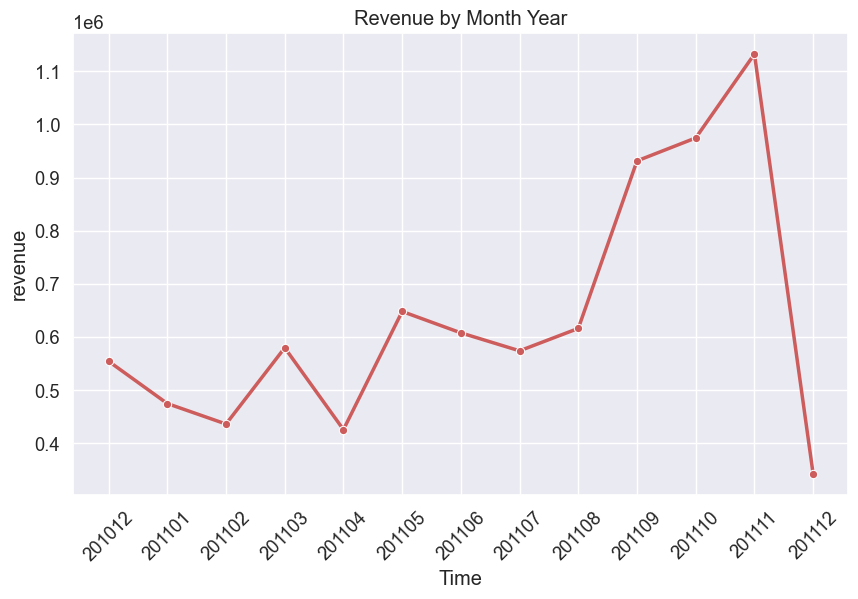

In [14]:
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_revenue, x='Year-Month', y='Revenue', color='#CD5C5C', linewidth=2.5, marker = "o")
plt.title('Revenue by Month Year')
plt.xlabel('Time')
plt.ylabel('revenue')
plt.xticks(df_revenue['Year-Month'])
plt.xticks(rotation=45)
plt.show()

#### Nhận thấy :
Doanh thu tăng cao đáng kể vào thời điểm cuối quý 3 và đầu quý 4, tăng hơn 100% so với trung bình doanh thu của các tháng trước đó. Điều này đưa ra giả thuyết , nhu cầu mua sắm trong cửa hàng của khách hàng cho các dịp cuối năm là rất cao , và các món đồ có giá trị lớn được trao đổi mua bán nhiều hơn, có thể là để phục vụ cho các dịp lễ cuối năm và chuẩn bị cho 1 năm mới. 

### Number of Customers

In [15]:
df_customer = df.groupby("Year-Month")["CustomerID"].nunique().reset_index()
df_customer.rename(columns = {"CustomerID" : "NumberOf_customers"}, inplace = True)
df_customer

,Year-Month,NumberOf_customers
0,201012,948
1,201101,783
2,201102,798
3,201103,1020
4,201104,899
5,201105,1079
6,201106,1051
7,201107,993
8,201108,980
9,201109,1302


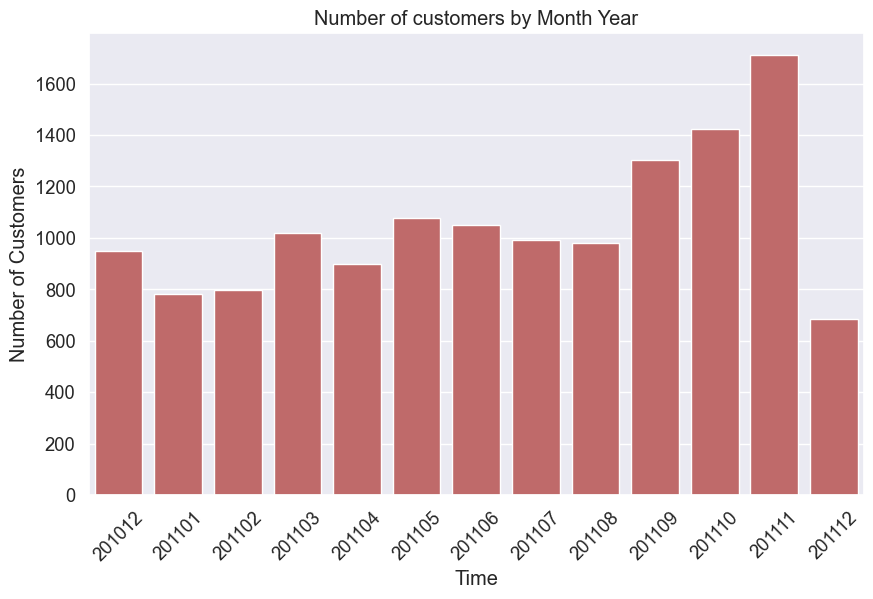

In [16]:
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_customer, x='Year-Month', y='NumberOf_customers', color='#CD5C5C')
plt.title('Number of customers by Month Year')
plt.xlabel('Time')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

#### Nhận thấy:
SỐ lượng khách hàng qua từng thời điểm cũng tỉ lệ thuận so với doanh thu, khi mà đa phần số lượng khách hàng lớn tập trung ở thời điểm cuối quý 3 và đầu quý 4. Điều này càng chứng minh cho giả thuyết, nhu cầu mua sắm của khách hàng thường tăng cao vào dịp cuối năm. Có 1 điểm cần chú ý, đó là lượng khách hàng tháng 12 năm 2011 tuy vấn thấp hơn so với các tháng , nhưng thấp hơn với phần trăm không đáng kể, đặc biệt là so với các tháng đầu năm 2011, tuy nhiên khi nhìn vào biểu đồ doanh thu ở mục trên thì thấy doanh thu tháng 12/2011 lại thấp hơn rất nhiều lần. Điều này đặt ra giả thuyết, đa phần giá trị doanh thu trên mỗi đơn hàng của khách hàng vào tháng 12 cuối năm là không được cao so với các tháng khác.

### Quantity of purchased product

In [17]:
df_quantity = df.groupby("Year-Month")["Quantity"].sum().reset_index()
df_quantity

,Year-Month,Quantity
0,201012,296362
1,201101,269379
2,201102,262833
3,201103,344012
4,201104,278585
5,201105,367852
6,201106,356922
7,201107,363418
8,201108,386612
9,201109,537496


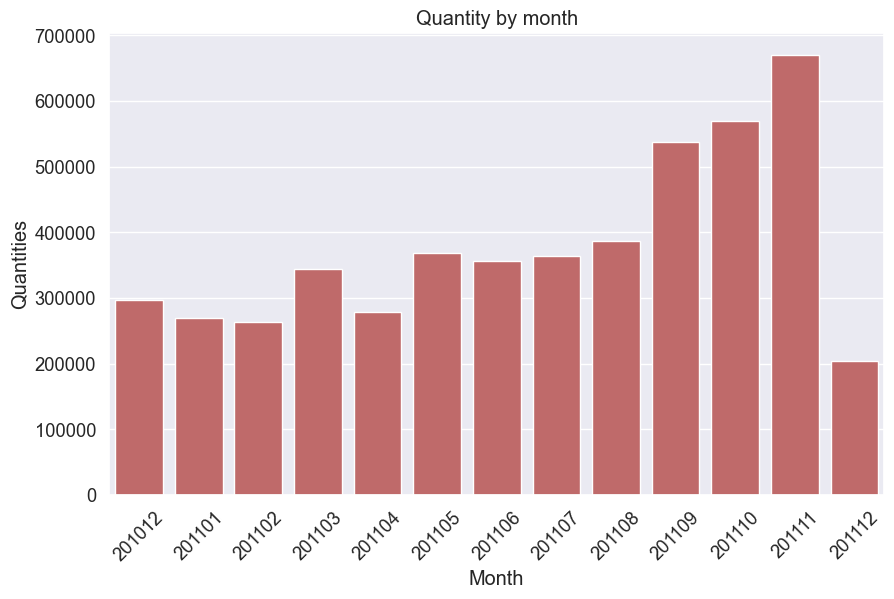

In [18]:
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_quantity, x="Year-Month", y='Quantity', color='#CD5C5C')
plt.title('Quantity by month')
plt.xlabel('Month')
plt.ylabel('Quantities')
plt.xticks(rotation=45)
plt.show()

#### Nhận thấy:
Số lượng hàng hóa được trao đổi qua từng thời điểm cũng tỉ lệ thuận so với doanh thu và số lượng khách hàng, khi mà đa phần số lượng hàng hóa được trao đổi lớn tập trung ở thời điểm cuối quý 3 và đầu quý 4. Điều này càng chứng minh cho giả thuyết, nhu cầu mua sắm của khách hàng thường tăng cao vào dịp cuối năm và đa phần giá trị doanh thu trên mỗi đơn hàng của khách hàng vào tháng 12 là không được cao so với các tháng khác, khi khách hàng thường mua những món đồ có giá trị thấp trong tháng 12.

### Numbers of Existing and New customer

In [19]:
df_customer_MinPurchaseDate = df.groupby("CustomerID")["InvoiceDate"].min().reset_index()
df_customer_MinPurchaseDate.columns= ["CustomerID","MinPurchaseDate"]
df_customer_MinPurchaseDate["Year-Month-Min"] = df_customer_MinPurchaseDate["MinPurchaseDate"].dt.year*100 + df_customer_MinPurchaseDate["MinPurchaseDate"].dt.month
df_customer_MinPurchaseDate["Year-Month-Min"] = df_customer_MinPurchaseDate["Year-Month-Min"].astype(str)
df_customer_MinPurchaseDate

,CustomerID,MinPurchaseDate,Year-Month-Min
0,12346.0,2011-01-18 10:01:00,201101
1,12347.0,2010-12-07 14:57:00,201012
2,12348.0,2010-12-16 19:09:00,201012
3,12349.0,2011-11-21 09:51:00,201111
4,12350.0,2011-02-02 16:01:00,201102
...,...,...,...
4367,18280.0,2011-03-07 09:52:00,201103
4368,18281.0,2011-06-12 10:53:00,201106
4369,18282.0,2011-08-05 13:35:00,201108
4370,18283.0,2011-01-06 14:14:00,201101


In [20]:
df_CustomerType = pd.merge(df.loc[:,["Year-Month","CustomerID","Revenue"]],df_customer_MinPurchaseDate, on = "CustomerID")
df_CustomerType.head()

,Year-Month,CustomerID,Revenue,MinPurchaseDate,Year-Month-Min
0,201012,17850.0,15.30,2010-12-01 08:26:00,201012
1,201012,17850.0,20.34,2010-12-01 08:26:00,201012
2,201012,17850.0,22.00,2010-12-01 08:26:00,201012
3,201012,17850.0,20.34,2010-12-01 08:26:00,201012
4,201012,17850.0,20.34,2010-12-01 08:26:00,201012


In [21]:
df_CustomerType["CustomerTypes"] = np.where(df_CustomerType["Year-Month"] != df_CustomerType["Year-Month-Min"],"Existing","New")
df_CustomerType

,Year-Month,CustomerID,Revenue,MinPurchaseDate,Year-Month-Min,CustomerTypes
0,201012,17850.0,15.30,2010-12-01 08:26:00,201012,New
1,201012,17850.0,20.34,2010-12-01 08:26:00,201012,New
2,201012,17850.0,22.00,2010-12-01 08:26:00,201012,New
3,201012,17850.0,20.34,2010-12-01 08:26:00,201012,New
4,201012,17850.0,20.34,2010-12-01 08:26:00,201012,New
...,...,...,...,...,...,...
406824,201112,12713.0,15.00,2011-12-09 12:16:00,201112,New
406825,201112,12713.0,10.20,2011-12-09 12:16:00,201112,New
406826,201112,12713.0,10.20,2011-12-09 12:16:00,201112,New
406827,201112,12713.0,24.96,2011-12-09 12:16:00,201112,New


In [22]:
df_CustomerType_count = df_CustomerType.groupby(["Year-Month","CustomerTypes"])["CustomerID"].nunique().reset_index()
df_CustomerType_count

,Year-Month,CustomerTypes,CustomerID
0,201012,New,948
1,201101,Existing,362
2,201101,New,421
3,201102,Existing,418
4,201102,New,380
5,201103,Existing,580
6,201103,New,440
7,201104,Existing,600
8,201104,New,299
9,201105,Existing,800


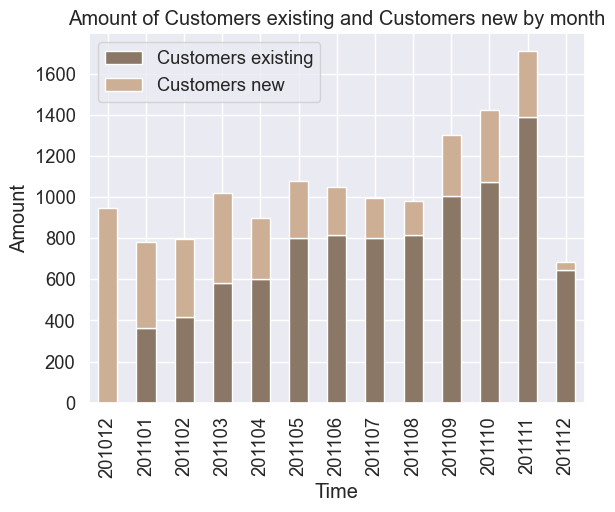

In [23]:
# Tạo bảng pivot từ DataFrame
pivot_table = df_CustomerType_count.pivot_table(index='Year-Month', columns='CustomerTypes', values='CustomerID', aggfunc='sum')

# Vẽ biểu đồ cột chồng với phần tách dựa trên cột 2
ax = pivot_table.plot(kind='bar', stacked=True, color = ["#8B7765","#CDAF95"])

# Đặt tiêu đề và nhãn cho các trục
plt.title('Amount of Customers existing and Customers new by month')
plt.xlabel('Time')
plt.ylabel('Amount')

# Hiển thị biểu đồ
plt.legend(["Customers existing","Customers new"])
plt.show()

#### Nhận thấy :
Cửa hàng đang có những chính sách giữ chân khách hàng cũ rất tốt, khi mà tỉ lệ khách hàng quay trở lại mua hàng ngày càng tăng qua thời gian. Đồng thời việc quảng bá thu hút khách hàng mới cũng đang cho thấy dấu hiệu khá ổn định, khi mà lượng khách hàng mới qua các tháng cũng tương đối đồng đều nhau và cao nhất là ở các tháng đầu năm.

### Revenue by Existing and New customer

In [24]:
df_CustomerType_rev = df_CustomerType.groupby(["Year-Month","CustomerTypes"])["Revenue"].sum().reset_index()
df_CustomerType_rev

,Year-Month,CustomerTypes,Revenue
0,201012,New,554604.020
1,201101,Existing,271616.520
2,201101,New,203457.860
3,201102,Existing,287024.770
4,201102,New,149521.380
5,201103,Existing,390034.530
6,201103,New,189930.080
7,201104,Existing,306283.600
8,201104,New,119764.251
9,201105,Existing,532392.340


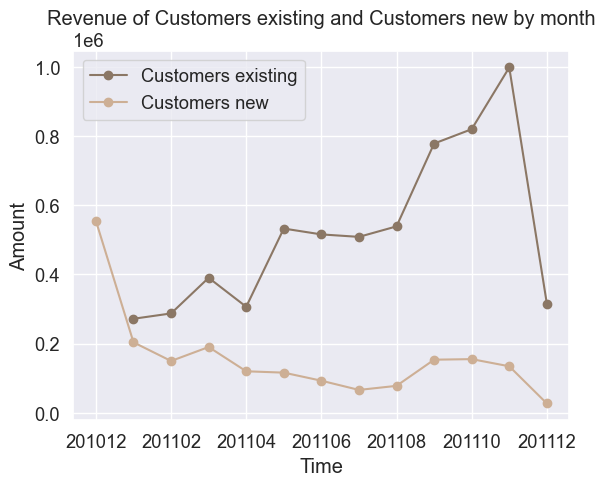

In [25]:
# Tạo bảng pivot từ DataFrame
pivot_table = df_CustomerType_rev.pivot_table(index='Year-Month', columns='CustomerTypes', values='Revenue', aggfunc='sum')

# Vẽ biểu đồ cột chồng với phần tách dựa trên cột 2
ax = pivot_table.plot(kind='line',marker = "o",color = ["#8B7765","#CDAF95"])

# Đặt tiêu đề và nhãn cho các trục
plt.title('Revenue of Customers existing and Customers new by month')
plt.xlabel('Time')
plt.ylabel('Amount')

# Hiển thị biểu đồ
plt.legend(["Customers existing","Customers new"])
plt.show()

#### Nhận thấy :
Phần lớn doanh thu của cửa hàng qua thời gian là tới từ tập khách hàng cũ, và càng về cuối năm thì khoảng cách doanh thu giữa tập khách hàng cũ và tập khách hàng mới ngày càng lớn. Điều này cho thấy cửa hàng có chính sách giữ chân khách hàng cũ và có khả năng đáp ứng nhu cầu mua sắm của các khách hàng mới rất tốt.

### Customer Retention rate and Churn rate by previous month

In [26]:
df_MonthlyCustomer = df.groupby(["Year-Month","CustomerID"])["Revenue"].sum().reset_index()
df_MonthlyCustomer

,Year-Month,CustomerID,Revenue
0,201012,12347.0,711.79
1,201012,12348.0,892.80
2,201012,12370.0,1868.02
3,201012,12377.0,1001.52
4,201012,12383.0,600.72
...,...,...,...
13670,201112,18245.0,894.25
13671,201112,18272.0,367.88
13672,201112,18273.0,51.00
13673,201112,18282.0,77.84


In [27]:
df_MonthlyCustomer = pd.crosstab(df_MonthlyCustomer["CustomerID"],df_MonthlyCustomer["Year-Month"])
df_MonthlyCustomer.head()

Year-Month,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
CustomerID,,,,,,,,,,,,,
12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
12347.0,1,1,0,0,1,0,1,0,1,0,1,0,1
12348.0,1,1,0,0,1,0,0,0,0,1,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,0,1,0
12350.0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [28]:
retention_array =[]

for i in range(0,len(df_MonthlyCustomer.columns)):
    retention_dict = {}
    This_month = df_MonthlyCustomer.columns[i]
    Pre_month =  df_MonthlyCustomer.columns[i-1]
    retention_dict["Year-Month"] = This_month
    retention_dict["TotalUser"] = df_MonthlyCustomer[This_month].sum()
    if(i==0):
        retention_dict["MonthlyReturnUser"] =0
    else :
        retention_dict["MonthlyReturnUser"] = df_MonthlyCustomer[(df_MonthlyCustomer[This_month] ==1) & (df_MonthlyCustomer[Pre_month] == 1)][This_month].sum()
    retention_array.append(retention_dict)

In [29]:
retention_array

[{'Year-Month': '201012', 'TotalUser': 948, 'MonthlyReturnUser': 0},
 {'Year-Month': '201101', 'TotalUser': 783, 'MonthlyReturnUser': 362},
 {'Year-Month': '201102', 'TotalUser': 798, 'MonthlyReturnUser': 299},
 {'Year-Month': '201103', 'TotalUser': 1020, 'MonthlyReturnUser': 345},
 {'Year-Month': '201104', 'TotalUser': 899, 'MonthlyReturnUser': 346},
 {'Year-Month': '201105', 'TotalUser': 1079, 'MonthlyReturnUser': 399},
 {'Year-Month': '201106', 'TotalUser': 1051, 'MonthlyReturnUser': 464},
 {'Year-Month': '201107', 'TotalUser': 993, 'MonthlyReturnUser': 415},
 {'Year-Month': '201108', 'TotalUser': 980, 'MonthlyReturnUser': 433},
 {'Year-Month': '201109', 'TotalUser': 1302, 'MonthlyReturnUser': 465},
 {'Year-Month': '201110', 'TotalUser': 1425, 'MonthlyReturnUser': 552},
 {'Year-Month': '201111', 'TotalUser': 1711, 'MonthlyReturnUser': 690},
 {'Year-Month': '201112', 'TotalUser': 686, 'MonthlyReturnUser': 443}]

In [30]:
df_MonthlyRetentionCustomer = pd.DataFrame(retention_array)
df_MonthlyRetentionCustomer.head()

,Year-Month,TotalUser,MonthlyReturnUser
0,201012,948,0
1,201101,783,362
2,201102,798,299
3,201103,1020,345
4,201104,899,346


In [31]:
df_MonthlyRetentionCustomer["MonthlyRetentionRate"] = df_MonthlyRetentionCustomer["MonthlyReturnUser"]/df_MonthlyRetentionCustomer["TotalUser"].shift(1)

In [32]:
df_MonthlyRetentionCustomer["MonthlyChurnRate"] = (df_MonthlyRetentionCustomer["TotalUser"].shift(1) - df_MonthlyRetentionCustomer["MonthlyReturnUser"])/df_MonthlyRetentionCustomer["TotalUser"].shift(1)

In [33]:
df_MonthlyRetentionCustomer = df_MonthlyRetentionCustomer.fillna(0)

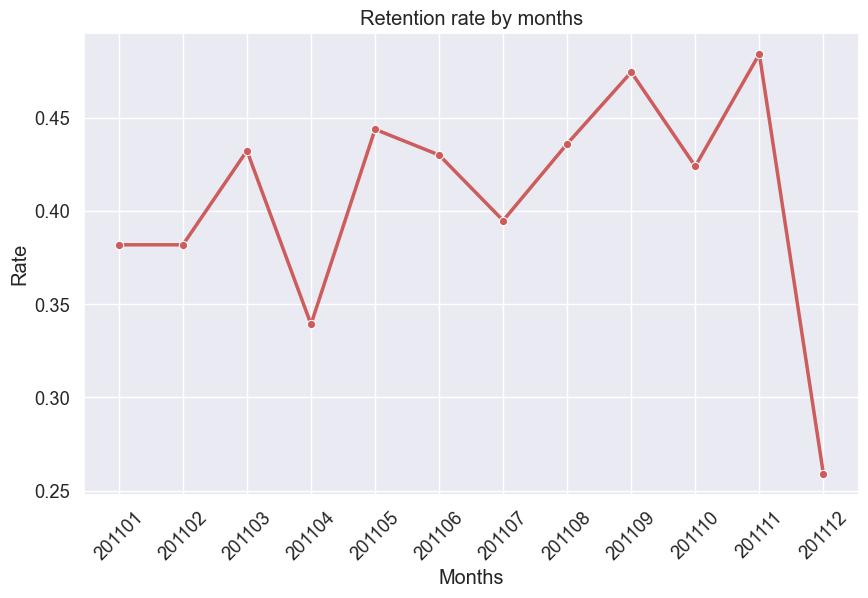

In [34]:
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_MonthlyRetentionCustomer.iloc[1:,:], x='Year-Month', y='MonthlyRetentionRate', color='#CD5C5C', linewidth=2.5, marker = "o")
plt.title('Retention rate by months')
plt.xlabel('Months')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.show()

#### Nhận thấy :
Tỉ lệ số lượng khách hàng quay trở lại mua hàng của từng tháng so với tháng trước đó mang tính chu kì, cao nhất ở các tháng 3, 5, 9, 10. Ví dụ ở tháng 5, trên tổng số lượng khách hàng cũ mua sắm ở tháng 5, thì có khoảng 45% khách hàng của tháng 4 quay trở lại mua hàng ở tháng 5. Biểu đồ này nhắm thể hiện rõ hơn về số liệu cho giả thuyết, cửa hàng đang có những chính sách giữ chân và duy trì tần suất mua hàng theo tháng của khách hàng rất ấn tượng.

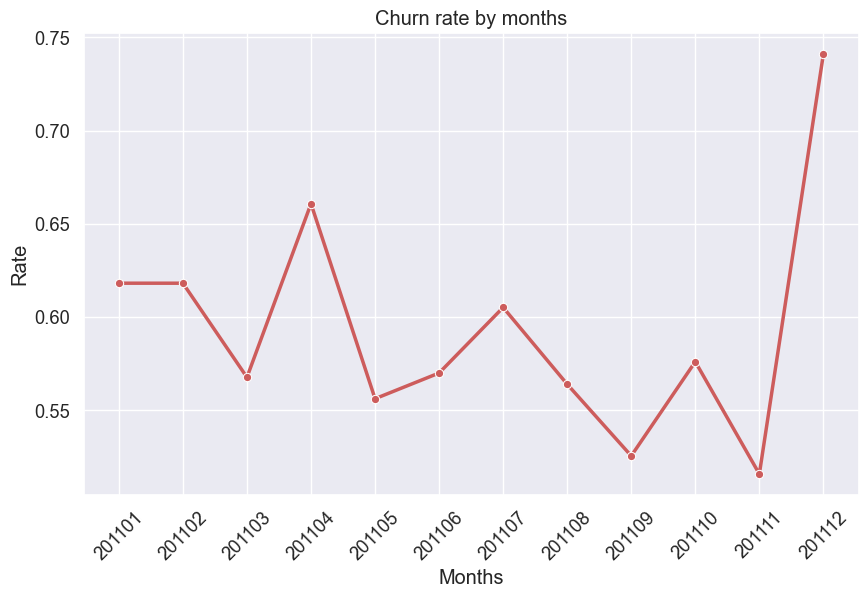

In [35]:
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_MonthlyRetentionCustomer.iloc[1:,:], x='Year-Month', y='MonthlyChurnRate', color='#CD5C5C', linewidth=2.5, marker = "o")
plt.title('Churn rate by months')
plt.xlabel('Months')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.show()

### All month retention rate by Cohort chart

In [36]:
cohort_retention_array =[]

for i in range(0,len(df_MonthlyCustomer.columns)):
    cohort_retention_dict = {}
    this_month_1 = df_MonthlyCustomer.columns[i]
    
    cohort_retention_dict["Year-Month"] = this_month_1
    
    for u in range(0,i):
        this_month_2 = df_MonthlyCustomer.columns[u]
        cohort_retention_dict[this_month_2] = 0
        
    cohort_retention_dict[df_MonthlyCustomer.columns[i]] = 1
    
    for y in range(i,len(df_MonthlyCustomer.columns)):
        this_month_3 = df_MonthlyCustomer.columns[y]
        count_users = df_MonthlyCustomer[(df_MonthlyCustomer[this_month_1] ==1) & (df_MonthlyCustomer[this_month_3] == 1)][this_month_1].sum()
        rate = round(count_users/df_MonthlyCustomer[this_month_1].sum(),2)  
        cohort_retention_dict[this_month_3] = rate
        
    cohort_retention_array.append(cohort_retention_dict)

In [37]:
df_TotalMonthly_Retention_Users = pd.DataFrame(cohort_retention_array)
df_TotalMonthly_Retention_Users

,Year-Month,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,201012,1.0,0.38,0.33,0.39,0.36,0.40,0.38,0.35,0.35,0.39,0.37,0.50,0.27
1,201101,0.0,1.00,0.38,0.44,0.39,0.46,0.43,0.40,0.40,0.44,0.43,0.53,0.29
2,201102,0.0,0.00,1.00,0.43,0.38,0.47,0.44,0.42,0.41,0.45,0.42,0.50,0.26
3,201103,0.0,0.00,0.00,1.00,0.34,0.45,0.42,0.39,0.37,0.43,0.40,0.49,0.25
4,201104,0.0,0.00,0.00,0.00,1.00,0.44,0.44,0.41,0.39,0.45,0.42,0.49,0.25
5,201105,0.0,0.00,0.00,0.00,0.00,1.00,0.43,0.42,0.42,0.45,0.43,0.51,0.25
6,201106,0.0,0.00,0.00,0.00,0.00,0.00,1.00,0.39,0.42,0.47,0.45,0.52,0.25
7,201107,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.44,0.46,0.47,0.53,0.26
8,201108,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.47,0.46,0.54,0.28
9,201109,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.42,0.54,0.26


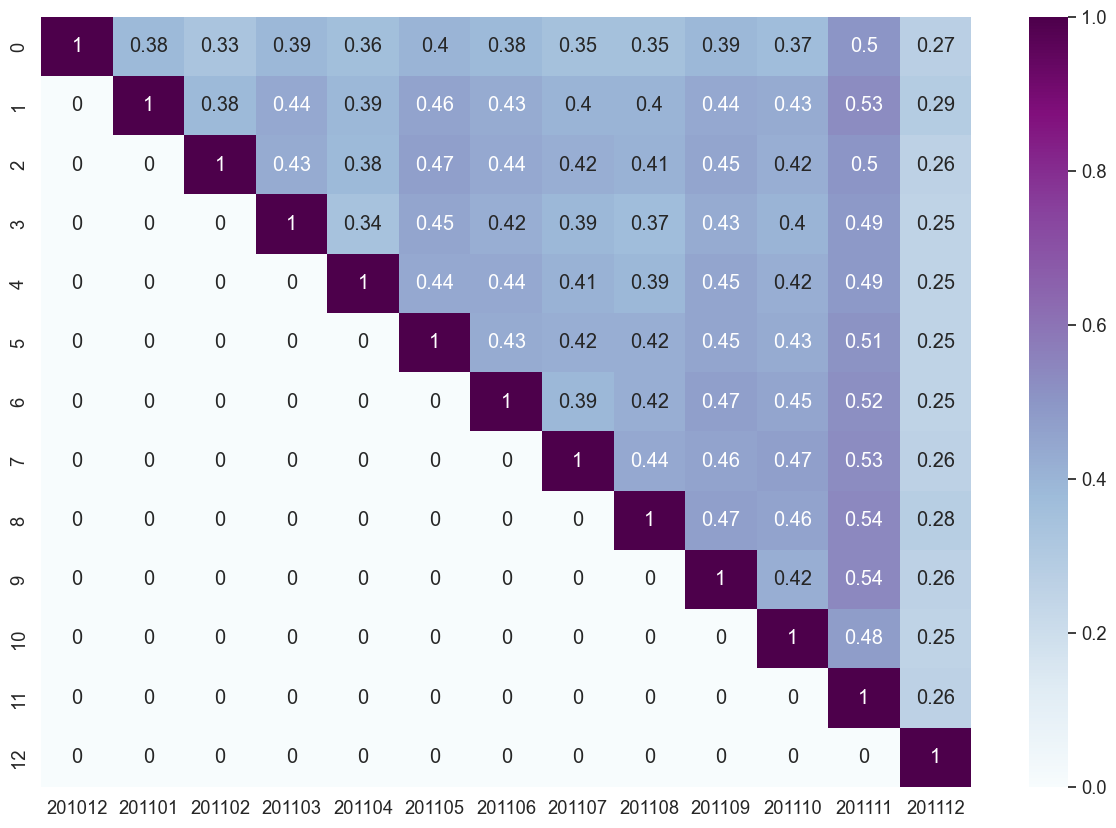

In [38]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_TotalMonthly_Retention_Users.iloc[:,1:], annot=True, cmap='BuPu')
plt.show()

#### Nhận thấy :
Biểu đồ Cohort cho thấy tỉ lệ quay trở lại mua hàng của khách hàng ở toàn bộ các tháng trước đó so với tháng hiện tại, chứ không chỉ 1 tháng trước , lấy ví dụ ở tháng 5. Trong tổng số khách hàng cũ mua sắm ở cửa hàng trong tháng 5, thì có 40% trên tổng khách đã mua hàng trong tháng 12/2010 quay trở lại mua hàng, 46% tổng khách đã mua hàng trong tháng 1/2011 quay trở lại mua hàng, 47% tổng khách đã mua hàng trong tháng 2/2011 quay trở lại mua hàng, 45% tổng khách đã mua hàng trong tháng 3/2011 quay trở lại mua hàng, 44% tổng khách đã mua hàng trong tháng 4/2011 quay trở lại mua hàng.

## Customer segmentation RFM analytics

### Recency

In [39]:
df_customer_recency = df.groupby("CustomerID")["InvoiceDate"].max().reset_index()
df_customer_recency.columns=["CustomerID","MaxPurchaseDate"]
df_customer_recency["Recency"] = (max(df_customer_recency["MaxPurchaseDate"]) - df_customer_recency["MaxPurchaseDate"]).dt.days
df_customer_recency

,CustomerID,MaxPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309
...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277
4368,18281.0,2011-06-12 10:53:00,180
4369,18282.0,2011-12-02 11:43:00,7
4370,18283.0,2011-12-06 12:02:00,3


(array([1248.,  685.,  402.,  399.,  217.,  133.,  130.,  108.,  103.,
         125.,  103.,   85.,   95.,   94.,   89.,   75.,   83.,   62.,
          21.,  115.]),
 array([  0.  ,  18.65,  37.3 ,  55.95,  74.6 ,  93.25, 111.9 , 130.55,
        149.2 , 167.85, 186.5 , 205.15, 223.8 , 242.45, 261.1 , 279.75,
        298.4 , 317.05, 335.7 , 354.35, 373.  ]),
 <BarContainer object of 20 artists>)

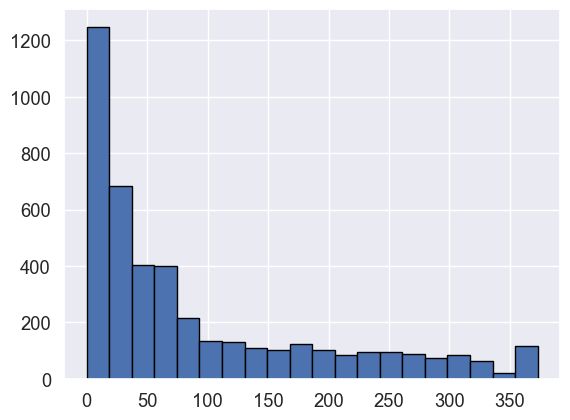

In [40]:
plt.hist(df_customer_recency["Recency"], bins=20, edgecolor='black')

#### Nhận thấy :
So với ngày cuối cùng trước khi lập báo cáo , thì biểu đồ cho thấy phần lớn lần gần nhất mua hàng của các khách hàng là tập trung ở mức từ 3 đến 4 tuần về trước.

In [41]:
x = df_customer_recency[["Recency"]]
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

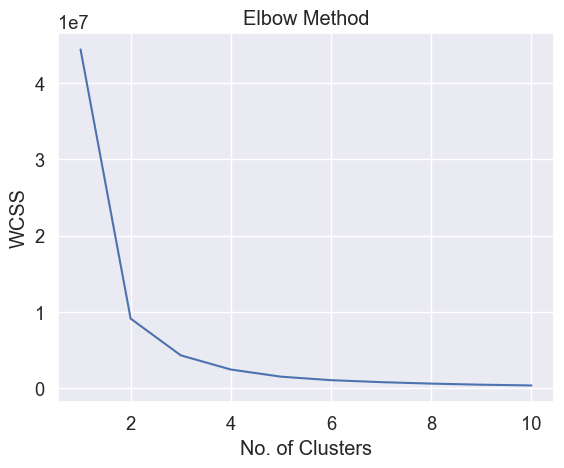

In [42]:
# Visualising elbow method
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

#### Phân cụm khách hàng bằng thuật toán Kmean dựa trên lần gần nhất mua hàng theo 4 mức độ 0, 1, 2 ,3. Với mức 0 là đối với các khách hàng có lần mua hàng cuối cùng cách xa nhất so với ngày cuối cùng trước khi lập báo cáo, và mức 3 là đối với các khách hàng có lần mua hàng cuối cùng  gần đây nhất so với ngày cuối cùng trước khi lập báo cáo.

In [43]:
kmeans=KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state=0)
df_customer_recency["RecencyCluster"] = kmeans.fit_predict(x)
df_customer_recency

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster
0,12346.0,2011-01-18 10:17:00,325,1
1,12347.0,2011-12-07 15:52:00,1,2
2,12348.0,2011-09-25 13:13:00,74,0
3,12349.0,2011-11-21 09:51:00,18,2
4,12350.0,2011-02-02 16:01:00,309,1
...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,1
4368,18281.0,2011-06-12 10:53:00,180,3
4369,18282.0,2011-12-02 11:43:00,7,2
4370,18283.0,2011-12-06 12:02:00,3,2


In [44]:
df_sorf_cluster = df_customer_recency.groupby("RecencyCluster")["Recency"].mean().reset_index()
df_sorf_cluster

,RecencyCluster,Recency
0,0,79.278918
1,1,308.851779
2,2,17.538533
3,3,189.451356


In [45]:
df_sorf_cluster = df_sorf_cluster.sort_values("Recency",ascending= False).reset_index(drop = True)
df_sorf_cluster["index"] = df_sorf_cluster.index
df_sorf_cluster

,RecencyCluster,Recency,index
0,1,308.851779,0
1,3,189.451356,1
2,0,79.278918,2
3,2,17.538533,3


In [46]:
df_customer_recency = pd.merge(df_customer_recency,df_sorf_cluster[["RecencyCluster","index"]], on = "RecencyCluster")
df_customer_recency = df_customer_recency.drop(["RecencyCluster","MaxPurchaseDate"],axis = 1)
df_customer_recency = df_customer_recency.rename(columns = {"index" : "RecencyCluster"})
df_customer_recency

,CustomerID,Recency,RecencyCluster
0,12346.0,325,0
1,12350.0,309,0
2,12361.0,286,0
3,12365.0,290,0
4,12373.0,310,0
...,...,...,...
4367,18231.0,191,1
4368,18239.0,218,1
4369,18260.0,172,1
4370,18262.0,139,1


### Frequency

In [47]:
df_customer_frequency = df.groupby("CustomerID")["InvoiceDate"].count().reset_index()
df_customer_frequency.columns=["CustomerID","Frequency"]
df_customer_frequency

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


(array([1828.,  838.,  428.,  213.,  135.,   93.,   61.,   42.,   32.,
          24.]),
 array([ 10.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <BarContainer object of 10 artists>)

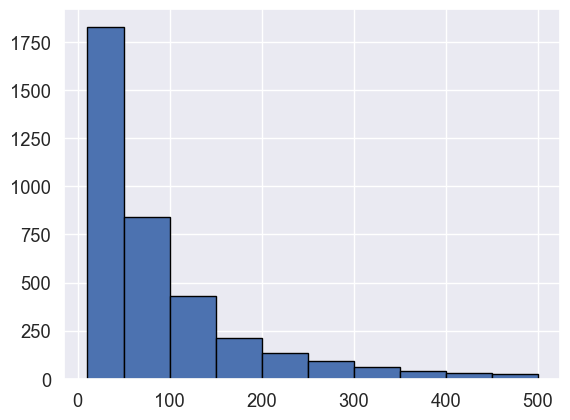

In [48]:
plt.hist(df_customer_frequency["Frequency"], bins=[10,50,100,150,200,250,300,350,400,450,500], edgecolor='black')

#### Nhận thấy :
So với ngày cuối cùng trước khi lập báo cáo , thì biểu đồ cho thấy phần lớn tần suất mua hàng của mỗi khách hàng tập trung ở mức 100 lần mua đổ xuống. 

In [49]:
df_customer_frequency["Frequency"].describe()

count    4372.000000
mean       93.053294
std       232.471608
min         1.000000
25%        17.000000
50%        42.000000
75%       102.000000
max      7983.000000
Name: Frequency, dtype: float64

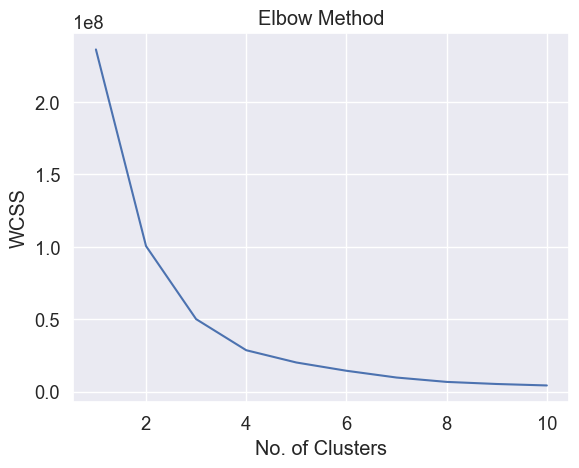

In [50]:
x = df_customer_frequency[["Frequency"]]
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# Visualising elbow method
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

#### Phân cụm khách hàng bằng thuật toán Kmean dựa trên tần suất mua hàng theo 4 mức độ 0, 1, 2 ,3. Với mức 0 là đối với các khách hàng có tần suất mua hàng thấp nhất, và mức 3 là đối với các khách hàng có tần suất mua hàng cao nhất.

In [51]:
kmeans=KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state=0)
df_customer_frequency["FrequencyCluster"] = kmeans.fit_predict(x)
df_customer_frequency

,CustomerID,Frequency,FrequencyCluster
0,12346.0,2,0
1,12347.0,182,0
2,12348.0,31,0
3,12349.0,73,0
4,12350.0,17,0
...,...,...,...
4367,18280.0,10,0
4368,18281.0,7,0
4369,18282.0,13,0
4370,18283.0,756,3


In [52]:
df_sorf_cluster = df_customer_frequency.groupby("FrequencyCluster")["Frequency"].mean().reset_index()
df_sorf_cluster

,FrequencyCluster,Frequency
0,0,49.753755
1,1,1349.750000
2,2,5914.000000
3,3,329.107884


In [53]:
df_sorf_cluster = df_sorf_cluster.sort_values("Frequency",ascending= True).reset_index(drop = True)
df_sorf_cluster["index"] = df_sorf_cluster.index
df_sorf_cluster

,FrequencyCluster,Frequency,index
0,0,49.753755,0
1,3,329.107884,1
2,1,1349.750000,2
3,2,5914.000000,3


In [54]:
df_customer_frequency = pd.merge(df_customer_frequency,df_sorf_cluster[["FrequencyCluster","index"]], on = "FrequencyCluster")
df_customer_frequency = df_customer_frequency.drop(["FrequencyCluster"],axis = 1)
df_customer_frequency = df_customer_frequency.rename(columns = {"index" : "FrequencyCluster"})
df_customer_frequency

,CustomerID,Frequency,FrequencyCluster
0,12346.0,2,0
1,12347.0,182,0
2,12348.0,31,0
3,12349.0,73,0
4,12350.0,17,0
...,...,...,...
4367,16549.0,981,2
4368,16931.0,898,2
4369,17511.0,1076,2
4370,17811.0,872,2


### Monetary

In [55]:
df_customer_monetary = df.groupby("CustomerID")["Revenue"].sum().reset_index()
df_customer_monetary.columns=["CustomerID","Monetary"]
df_customer_monetary

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [56]:
df_customer_monetary["Monetary"].describe()

count      4372.000000
mean       1898.459701
std        8219.345141
min       -4287.630000
25%         293.362500
50%         648.075000
75%        1611.725000
max      279489.020000
Name: Monetary, dtype: float64

(array([1617.,  907.,  467.,  290.,  194.,  143.,  101.,   87.,   50.]),
 array([ 100.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 <BarContainer object of 9 artists>)

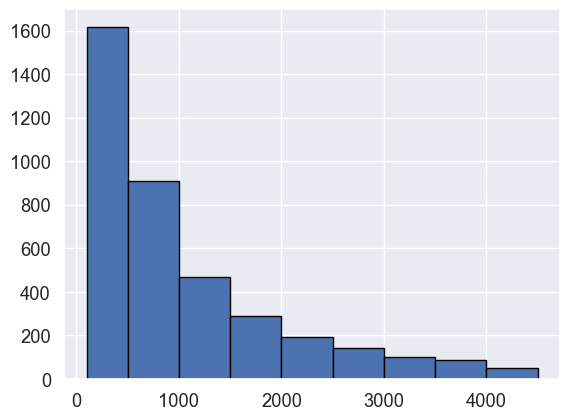

In [57]:
plt.hist(df_customer_monetary["Monetary"], bins=[100,500,1000,1500,2000,2500,3000,3500,4000,4500], edgecolor='black')

#### Nhận thấy :
So với ngày cuối cùng trước khi lập báo cáo , thì biểu đồ cho thấy phần lớn doanh số tới từ mỗi khách hàng tập trung ở mức 1000$ đổ xuống

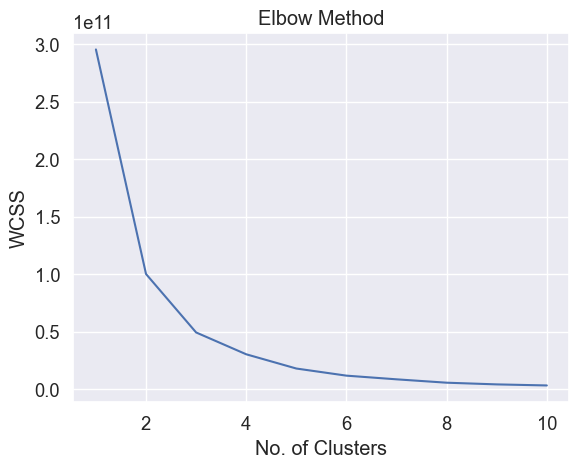

In [58]:
x = df_customer_monetary[["Monetary"]]
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# Visualising elbow method
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

#### Phân cụm khách hàng bằng thuật toán Kmean dựa trên doanh số của mỗi khách hàng theo 4 mức độ 0, 1, 2 ,3. Với mức 0 là đối với các khách hàng doanh số thấp nhất, và mức 3 là đối với các khách hàng có doanh số cao nhất.

In [59]:
kmeans=KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state=0)
df_customer_monetary["MonetaryCluster"] = kmeans.fit_predict(x)
df_customer_monetary

,CustomerID,Monetary,MonetaryCluster
0,12346.0,0.00,0
1,12347.0,4310.00,0
2,12348.0,1797.24,0
3,12349.0,1757.55,0
4,12350.0,334.40,0
...,...,...,...
4367,18280.0,180.60,0
4368,18281.0,80.82,0
4369,18282.0,176.60,0
4370,18283.0,2094.88,0


In [60]:
df_sorf_cluster = df_customer_monetary.groupby("MonetaryCluster")["Monetary"].mean().reset_index()
df_sorf_cluster

,MonetaryCluster,Monetary
0,0,1160.746285
1,1,71423.516000
2,2,241136.560000
3,3,15390.295980


In [61]:
df_sorf_cluster = df_sorf_cluster.sort_values("Monetary",ascending= True).reset_index(drop = True)
df_sorf_cluster["index"] = df_sorf_cluster.index
df_sorf_cluster

,MonetaryCluster,Monetary,index
0,0,1160.746285,0
1,3,15390.295980,1
2,1,71423.516000,2
3,2,241136.560000,3


In [62]:
df_customer_monetary = pd.merge(df_customer_monetary,df_sorf_cluster[["MonetaryCluster","index"]], on = "MonetaryCluster")
df_customer_monetary = df_customer_monetary.drop(["MonetaryCluster"],axis = 1)
df_customer_monetary = df_customer_monetary.rename(columns = {"index" : "MonetaryCluster"})
df_customer_monetary

,CustomerID,Monetary,MonetaryCluster
0,12346.0,0.00,0
1,12347.0,4310.00,0
2,12348.0,1797.24,0
3,12349.0,1757.55,0
4,12350.0,334.40,0
...,...,...,...
4367,17511.0,88125.38,2
4368,17949.0,52750.84,2
4369,14646.0,279489.02,3
4370,17450.0,187482.17,3


### RFM combination and clustering

#### Kết hợp 3 phân cụm RFM của khách hàng đã thực hiện ở trên lại bằng cách cộng tổng các cụm RFM (0,1,2,3) lại với nhau ứng với mỗi khách hàng. Vậy là ta có 1 phân cụm mới cho mỗi khách hàng với các mức độ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ( ví dụ 1 khách hàng có Recency được phân vào nhóm 1, Frequency nhóm 2, Monetary nhóm 3, thì phân cụm mới của họ là nhóm 6).  Với quy ước , các khách hàng thuộc nhóm 0, 1, 2 là các khách hàng LowValue, các khách hàng thuộc nhóm 3, 4, 5 là các khách hàng MidiumValue, các khách hàng thuộc nhóm 7, 8, 9 là các khách hàng HighValue.

In [63]:
df_customer_RFM = pd.merge(df_customer_recency,df_customer_frequency, on = "CustomerID")
df_customer_RFM = pd.merge(df_customer_RFM,df_customer_monetary, on = "CustomerID")
df_customer_RFM

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster
0,12346.0,325,0,2,0,0.00,0
1,12350.0,309,0,17,0,334.40,0
2,12361.0,286,0,10,0,189.90,0
3,12365.0,290,0,23,0,320.69,0
4,12373.0,310,0,14,0,364.60,0
...,...,...,...,...,...,...,...
4367,18231.0,191,1,126,0,2066.17,0
4368,18239.0,218,1,88,0,1561.61,0
4369,18260.0,172,1,140,0,2595.00,0
4370,18262.0,139,1,13,0,149.48,0


In [64]:
df_customer_RFM["RFMCluster"] = df_customer_RFM["RecencyCluster"]+df_customer_RFM["FrequencyCluster"]+df_customer_RFM["MonetaryCluster"]
df_customer_RFM

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,RFMCluster
0,12346.0,325,0,2,0,0.00,0,0
1,12350.0,309,0,17,0,334.40,0,0
2,12361.0,286,0,10,0,189.90,0,0
3,12365.0,290,0,23,0,320.69,0,0
4,12373.0,310,0,14,0,364.60,0,0
...,...,...,...,...,...,...,...,...
4367,18231.0,191,1,126,0,2066.17,0,1
4368,18239.0,218,1,88,0,1561.61,0,1
4369,18260.0,172,1,140,0,2595.00,0,1
4370,18262.0,139,1,13,0,149.48,0,1


In [65]:
df_customer_RFM["Valuable_Customer_Rank"] = np.where(df_customer_RFM["RFMCluster"].isin([0,1,2]),"LowValue",
                                            np.where(df_customer_RFM["RFMCluster"].isin([3,4,5]),"MidiumValue","HighValue"))
df_customer_RFM

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,RFMCluster,Valuable_Customer_Rank
0,12346.0,325,0,2,0,0.00,0,0,LowValue
1,12350.0,309,0,17,0,334.40,0,0,LowValue
2,12361.0,286,0,10,0,189.90,0,0,LowValue
3,12365.0,290,0,23,0,320.69,0,0,LowValue
4,12373.0,310,0,14,0,364.60,0,0,LowValue
...,...,...,...,...,...,...,...,...,...
4367,18231.0,191,1,126,0,2066.17,0,1,LowValue
4368,18239.0,218,1,88,0,1561.61,0,1,LowValue
4369,18260.0,172,1,140,0,2595.00,0,1,LowValue
4370,18262.0,139,1,13,0,149.48,0,1,LowValue


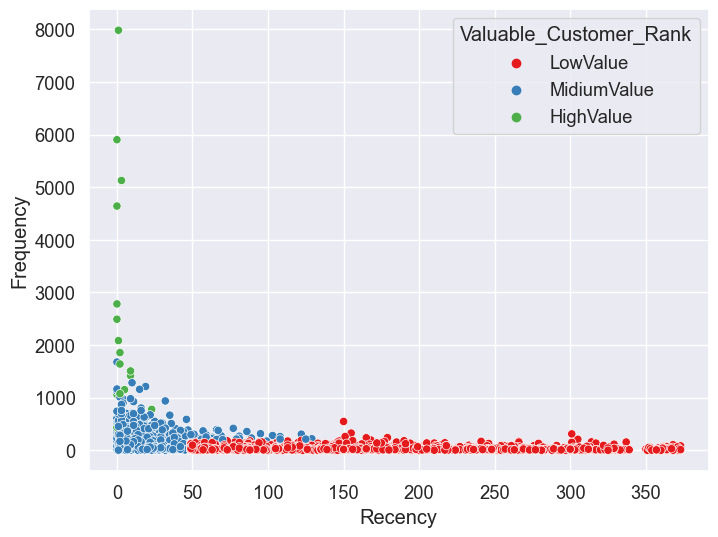

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_customer_RFM, x='Recency', y='Frequency', hue='Valuable_Customer_Rank',palette='Set1')

# Hiển thị biểu đồ
plt.show()

#### Nhận thấy :
Các khách hàng có giá trị cao và trung bình, đều là những khách hàng có tần suất mua hàng cao và lần gần nhất họ mua hàng tập trung ở mức 50 ngày đổ xuống

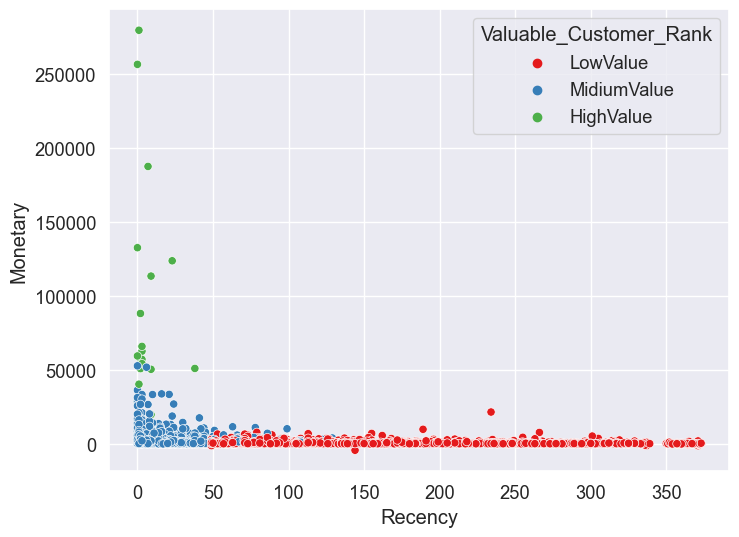

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_customer_RFM, x='Recency', y='Monetary', hue='Valuable_Customer_Rank',palette='Set1')

# Hiển thị biểu đồ
plt.show()

#### Nhận thấy :
Các khách hàng có giá trị cao và trung bình, đều là những khách hàng có doanh số mua hàng cao và lần gần nhất họ mua hàng tập trung ở mức 50 ngày đổ xuống

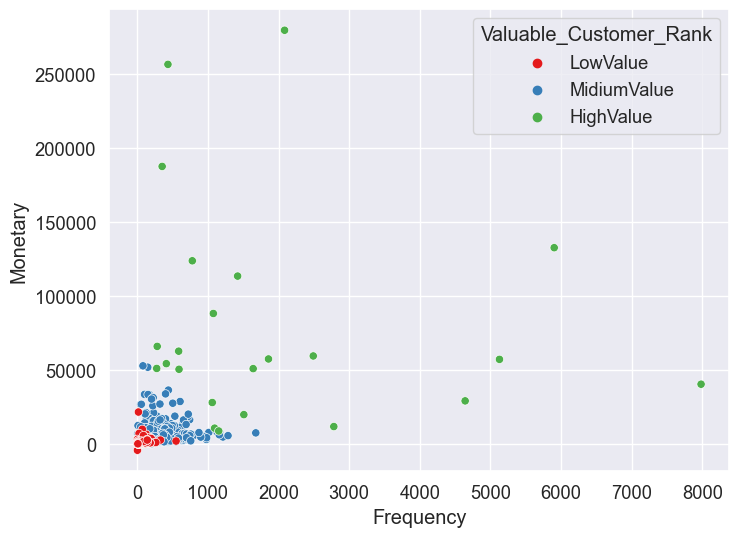

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_customer_RFM, x='Frequency', y='Monetary', hue='Valuable_Customer_Rank',palette='Set1')

# Hiển thị biểu đồ
plt.show()

#### Nhận thấy :
Các khách hàng có giá trị cao và trung bình, đều là những khách hàng có tần suất mua hàng cao và doanh số mua hàng cũng cao. Tuy nhiên có những trường hợp tần suất mua hàng của 1 khách hàng cao nhưng doanh số không cao bằng những khách hàng có tần suất mua hàng thấp hơn, là do giá trị trên mỗi đơn hàng có 2 người họ có sự chênh lệnh, 1 người thì có nhu cầu mua những mặt hàng có giá trị cao , còn 1 người thì có nhu cầu mua những món hàng có giá trị thấp.

## Products purchased together analytics

#### Phân tích những mặt hàng nào thường được khách hàng mua kèm nhau mỗi khi đi mua sắm ở cửa hàng bằng phương pháp Apriori

In [69]:
df_product = df.copy()
df_product = df_product[df['InvoiceNo'].duplicated()]

In [70]:
df_combined_product = df_product.groupby('InvoiceNo')['StockCode'].apply(lambda x : list(x)).reset_index()

In [71]:
df_combined_product['StockCode']

0            [71053, 84406B, 84029G, 84029E, 22752, 21730]
1                                                  [22632]
2        [22745, 22748, 22749, 22310, 84969, 22623, 226...
3                                    [22913, 22912, 22914]
4        [22727, 22726, 21724, 21883, 10002, 21791, 210...
                               ...                        
18790                                [22171, 21876, 20914]
18791                         [22720, 21216, 21535, 21232]
18792                                              [22098]
18793                                              [23144]
18794                                              [20979]
Name: StockCode, Length: 18795, dtype: object

In [72]:
product_list = list(df_combined_product['StockCode'])
product_list

[['71053', '84406B', '84029G', '84029E', '22752', '21730'],
 ['22632'],
 ['22745',
  '22748',
  '22749',
  '22310',
  '84969',
  '22623',
  '22622',
  '21754',
  '21755',
  '21777',
  '48187'],
 ['22913', '22912', '22914'],
 ['22727',
  '22726',
  '21724',
  '21883',
  '10002',
  '21791',
  '21035',
  '22326',
  '22629',
  '22659',
  '22631',
  '22661',
  '21731',
  '22900',
  '21913',
  '22540',
  '22544',
  '22492',
  'POST'],
 ['22633'],
 ['71053',
  '84406B',
  '20679',
  '37370',
  '21871',
  '21071',
  '21068',
  '82483',
  '82486',
  '82482',
  '82494L',
  '84029G',
  '84029E',
  '22752',
  '21730'],
 ['71053',
  '84406B',
  '20679',
  '37370',
  '21871',
  '21071',
  '21068',
  '82483',
  '82486',
  '82482',
  '82494L',
  '84029G',
  '84029E',
  '22752',
  '21730'],
 ['21733'],
 ['22633'],
 ['85099C',
  '21033',
  '20723',
  '84997B',
  '84997C',
  '21094',
  '20725',
  '21559',
  '22352',
  '21212',
  '21975',
  '21977',
  '84991',
  '84519A',
  '85183B',
  '85071B',
  '21931'

In [73]:
tran_encoder = TransactionEncoder()
tran_data = tran_encoder.fit_transform(product_list)
tran_data

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [74]:
tran_df = pd.DataFrame(data=tran_data, columns=tran_encoder.columns_)
tran_df

,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214W,90214Y,90214Z,BANK CHARGES,C2,D,DOT,M,PADS,POST
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18790,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18791,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18792,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18793,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
freq_itemsets = apriori(tran_df, min_support=0.02, use_colnames=True)
freq_itemsets

,support,itemsets
0,0.028412,(20685)
1,0.025007,(20712)
2,0.020325,(20713)
3,0.027401,(20719)
4,0.026018,(20723)
...,...,...
221,0.021974,"(23203, 23209)"
222,0.023623,"(23203, 85099B)"
223,0.023091,"(23301, 23300)"
224,0.023517,"(82482, 82494L)"


In [76]:
rules = association_rules(freq_itemsets, metric='confidence', min_threshold=0.5)
rules.sort_values("confidence", ascending=False ).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(22698),(22697),0.029157,0.037031,0.023198,0.795620,21.485181,0.022118,4.711669,0.982091
13,(22698),(22699),0.029157,0.040596,0.021442,0.735401,18.115164,0.020258,3.625886,0.973172
11,(22697),(22699),0.037031,0.040596,0.026656,0.719828,17.731533,0.025153,3.424335,0.979890
19,(23300),(23301),0.032987,0.038414,0.023091,0.700000,18.222299,0.021824,3.205285,0.977363
7,(22630),(22629),0.032136,0.036605,0.021495,0.668874,18.272515,0.020319,2.909451,0.976659


#### Đây là top 5 cặp mặt hàng có số lần được mua cùng nhau cao nhất, dựa vào chỉ số condidence.
+ Khi 1 khách hàng mua mặt hàng có mã (22698) thì 79,6% khả năng họ cũng sẽ mua kèm mặt hàng có mã (22697)
+ Khi 1 khách hàng mua mặt hàng có mã (22698) thì 73,5% khả năng họ cũng sẽ mua kèm mặt hàng có mã (22699)
+ Khi 1 khách hàng mua mặt hàng có mã (22697) thì 72% khả năng họ cũng sẽ mua kèm mặt hàng có mã (22699)
+ Khi 1 khách hàng mua mặt hàng có mã (23300) thì 70% khả năng họ cũng sẽ mua kèm mặt hàng có mã (23301)
+ Khi 1 khách hàng mua mặt hàng có mã (22630) thì 67% khả năng họ cũng sẽ mua kèm mặt hàng có mã (22629)

# Recommendation

## Tỉ lệ quay lại mua hàng: 
Tỉ lệ quay lại mua hàng của khách hàng khoảng 35-40% là một con số tương đối tốt. Điều này cho thấy cửa hàng có một lượng khách hàng trung thành. Tuy nhiên, để tăng tỷ lệ này, có thể thực hiện một số biện pháp như:

+ Tạo ra chương trình khách hàng thân thiết: Cung cấp các ưu đãi đặc biệt, giảm giá hoặc phần thưởng cho khách hàng trung thành để khuyến khích họ quay lại mua hàng.
+ Cải thiện trải nghiệm khách hàng: Đảm bảo rằng dịch vụ và sản phẩm của cửa hàng đáp ứng đúng nhu cầu và mong đợi của khách hàng. Tạo ra một trải nghiệm mua hàng tốt để khách hàng muốn quay lại.
+ Gửi thông điệp và khuyến mãi thông qua email hoặc thông qua các kênh truyền thông xã hội để nhắc nhở khách hàng về cửa hàng và khuyến khích họ quay lại mua hàng.

## Thu hút khách hàng mới: 
Việc thu hút khách hàng mới đều đặn qua các tháng là một dấu hiệu tích cực. Để tiếp tục thu hút khách hàng mới và mở rộng cơ sở khách hàng, cửa hàng có thể áp dụng các chiến lược sau:

+ Tiếp cận khách hàng tiềm năng thông qua quảng cáo và marketing: Sử dụng các kênh quảng cáo trực tuyến và ngoại tuyến để tăng cường nhận thức về cửa hàng và thu hút khách hàng mới.
+ Tạo ra một chương trình khuyến mãi hoặc ưu đãi đặc biệt cho khách hàng mới: Điều này có thể bao gồm giảm giá hoặc phần thưởng cho đơn hàng đầu tiên của khách hàng mới.
+ Tăng cường mối quan hệ với cộng đồng địa phương: Tham gia vào các sự kiện cộng đồng, tài trợ hoặc hỗ trợ các hoạt động cộng đồng để tạo dựng hình ảnh tốt và thu hút khách hàng mới.

## Phân loại khách hàng theo chỉ số RFM: 
Phân loại khách hàng thành các nhóm high value, medium value và low value thông qua phân tích RFM là một cách tốt để hiểu và tương tác với từng nhóm khách hàng một cách hiệu quả. Dựa trên phân loại này, bạn có thể thực hiện các biện pháp sau đây:

+ Tăng cường dịch vụ và chăm sóc khách hàng cho nhóm high value: Cung cấp dịch vụ tốt hơn, ưu đãi đặc biệt và chương trình khuyến mãi riêng cho nhóm khách hàng có giá trị cao để duy trì và tăng thêm giá trị từ nhóm này.
+ Phát triển chiến lược marketing đặc thù cho từng nhóm khách hàng: Tùy chỉnh thông điệp và chiến lược marketing để đáp ứng nhu cầu và mong đợi đặc biệt của từng nhóm khách hàng.
+ Tìm hiểu nguyên nhân khi nhóm khách hàng có giá trị thấp: Nếu nhóm low value chiếm tỷ lệ lớn, nCó một số điểm mà bạn có thể đánh giá và thực hiện để đưa ra giải pháp hữu ích cho cửa hàng của bạn:
## Top 5 cặp mặt hàng được mua kèm nhau nhất : 
Cửa hàng có thể sử dụng thông tin này để đưa ra các giải pháp hữu ích cho cửa hàng của bạn. Dưới đây là một số ý tưởng và khuyến nghị:

+ Hiển thị các sản phẩm liên quan cùng nhau: Dựa trên thông tin về các cặp mặt hàng được mua kèm nhau, cửa hàng có thể sắp xếp và hiển thị các sản phẩm liên quan cùng nhau trên các kệ hoặc trang web của cửa hàng.

+ Tạo gói combo hoặc ưu đãi đặc biệt: Dựa trên các cặp mặt hàng được mua kèm nhau, cửa hàng  có thể tạo ra các gói combo hoặc ưu đãi đặc biệt cho các sản phẩm này. 

+ Đặt các sản phẩm liên quan gần nhau: Khi bố trí cửa hàng, hãy đặt các sản phẩm liên quan gần nhau để khách hàng dễ dàng tìm thấy và mua hàng. 

+ Tiếp thị chéo giữa các sản phẩm: Sử dụng các kênh tiếp thị để quảng bá các sản phẩm liên quan cùng nhau. Ví dụ: trong chiến dịch email marketing hoặc quảng cáo trên trang web.